# Data exploration

In [64]:
import pandas            as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import sqlite3           as sql

In [4]:
conn = sql.connect("../selenium/news.db")
cur  = conn.cursor()

In [56]:
conn1 = sql.connect("../news/news.db")

In [58]:
globo = pd.read_sql_query("SELECT date(date) AS day, COUNT(*) AS volume FROM g1 GROUP BY day;",
    conn1,
    index_col = 'day',
    parse_dates = ['day'])

In [45]:
correio = pd.read_sql_query("SELECT date(date) AS day, COUNT(*) AS volume FROM correio2 GROUP BY day;",
    conn,
    index_col = 'day',
    parse_dates = ['day'])

In [52]:
minas = pd.read_sql_query("SELECT date(date) AS day, COUNT(*) AS volume FROM minas7 GROUP BY day;",
    conn,
    index_col = 'day',
    parse_dates = ['day'])
minas = minas[minas['volume'] < 1000]

In [48]:
ig = pd.read_sql_query("SELECT date(date) AS day, COUNT(*) AS volume FROM ig GROUP BY day;",
    conn,
    index_col = 'day',
    parse_dates = ['day'])

In [49]:
uol = pd.read_sql_query("SELECT date(date) AS day, COUNT(*) AS volume FROM uol6 GROUP BY day;",
    conn,
    index_col = 'day',
    parse_dates = ['day'])

[]

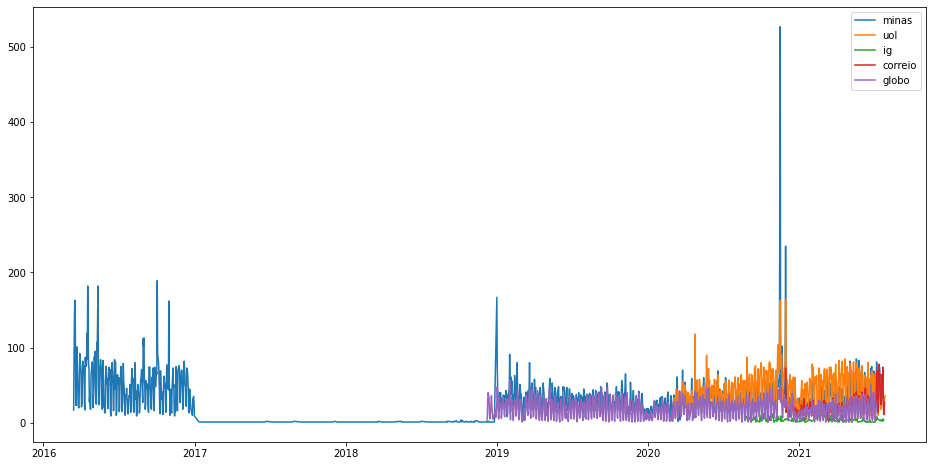

In [60]:
fig, ax = plt.subplots(figsize=(16,8))
#fmt_half_year = mdates.MonthLocator(interval=6)
#ax.xaxis.set_major_locator(fmt_half_year)
#fmt_month = mdates.MonthLocator()
#ax.xaxis.set_minor_locator(fmt_month)
plt.plot(minas,label='minas')
plt.plot(uol,label='uol')
plt.plot(ig,label='ig')
plt.plot(correio,label='correio')
plt.plot(globo,label='globo')
plt.legend()
plt.plot()

In [65]:
minasglobo = minas + globo

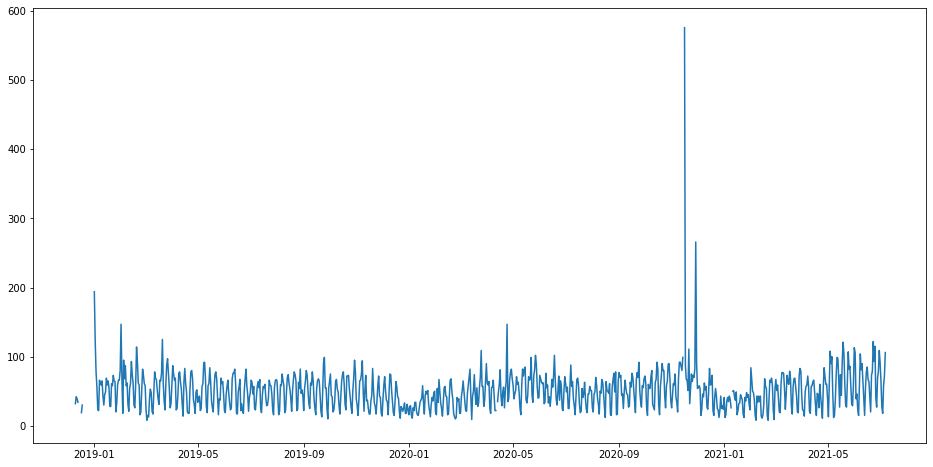

In [66]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(minasglobo)
plt.show()